<a href="https://colab.research.google.com/github/CristobalSVM/Aprendizaje-Automatico/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
#Importar libreria para abrir xlsx o csv.
import pandas as pd

#Acceso a google drive
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

#Carga de base
bd_BR = "/content/drive/MyDrive/Tarea 2 BD_BR.xlsx"
df = pd.read_excel(bd_BR)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1.0,201612.0,9.748517e+10,2.922565e+10,3.542812e+10,6.761324e+09,147.0,274.0,75627.0
1,2.0,201701.0,9.912669e+10,2.913157e+10,3.661224e+10,6.610840e+09,149.0,283.0,76116.0
2,3.0,201702.0,9.860860e+10,2.834034e+10,3.770951e+10,6.352306e+09,149.0,282.0,77057.0
3,4.0,201703.0,9.858651e+10,2.855841e+10,3.813770e+10,6.238445e+09,149.0,284.0,78379.0
4,5.0,201704.0,9.731282e+10,2.946925e+10,3.867970e+10,6.377189e+09,149.0,283.0,79406.0
...,...,...,...,...,...,...,...,...,...
56,57.0,202108.0,1.601921e+11,6.032032e+10,4.633195e+10,4.434798e+09,169.0,351.0,205704.0
57,58.0,202109.0,1.600526e+11,6.118401e+10,4.541217e+10,4.333770e+09,170.0,364.0,212165.0
58,59.0,202110.0,1.616247e+11,6.153808e+10,4.461547e+10,4.450421e+09,157.0,349.0,219334.0
59,60.0,202111.0,1.643413e+11,6.303590e+10,4.425472e+10,4.662185e+09,158.0,360.0,227138.0


In [139]:
 # Cambiar tipo de variable 
 convertir = {'id': int,
                'fecha': int,
                'sucursales': int,
                'cajeros': int,
                'tarjetas': int}  
  
df = df.astype(convertir)  
print(df.dtypes)

id                            int64
fecha                         int64
activo                      float64
vista                       float64
plazo                       float64
prestamos interbancarios    float64
sucursales                    int64
cajeros                       int64
tarjetas                      int64
dtype: object


In [140]:
# modificar columnas fecha, activo, vista, plazo, prestamos interbancarios para tener unidades de millones de pesos
df['activo'] = df['activo']/1000000 
df['vista'] = df['vista']/1000000
df['plazo'] = df['plazo']/1000000
df['prestamos interbancarios'] = df['prestamos interbancarios']/1000000
df

,id,fecha,activo,vista,plazo,prestamos interbancarios,sucursales,cajeros,tarjetas
0,1,201612,97485.166229,29225.647457,35428.115940,6761.324060,147,274,75627
1,2,201701,99126.687818,29131.569781,36612.242954,6610.839888,149,283,76116
2,3,201702,98608.600975,28340.337574,37709.507528,6352.305520,149,282,77057
3,4,201703,98586.509106,28558.414751,38137.700755,6238.444715,149,284,78379
4,5,201704,97312.822576,29469.246336,38679.704639,6377.189215,149,283,79406
...,...,...,...,...,...,...,...,...,...
56,57,202108,160192.052221,60320.321810,46331.947444,4434.797863,169,351,205704
57,58,202109,160052.609554,61184.005188,45412.168111,4333.770086,170,364,212165
58,59,202110,161624.690860,61538.079059,44615.468429,4450.421055,157,349,219334
59,60,202111,164341.303018,63035.903530,44254.716609,4662.184942,158,360,227138


#Crear funciones para calcular las medidas de tendencia central y de dispersión con Python puro (sin librerías)


## Medidas de tendencia central

---



In [141]:
 # Media numero de sucursales
cantidad = list(range(0,61,1))
n = 61
suma = 0
for i in cantidad:
  suma = suma + df['sucursales'][i]

 media = suma/n
 media

157.91803278688525

In [142]:
# Mediana de sucursales: son 61 registros por lo tanto, la mediana es la posición 31 por ser python, el indice es 30
n = 61

if n%2 == 1:
  pos_mediana = 0.5*(n+1)
else:
  pos_mediana = 0.5*(0.5*(n)+0.5*(n+1))

pos_mediana = pos_mediana - 1
pos_mediana

30.0

In [143]:
# Ordenamos de menor a mayor la columna de sucursales y obtenermos la posición 31
lista_sucursales = df['sucursales']
type(lista_sucursales)
sorted_series = lista_sucursales.sort_values(ascending= True)
sorted_series[30]


159

In [144]:
# Moda de columna sucursales
lista_sucursales = df['sucursales']

# Mostramos los elementos de menor a mayor que hay en variable sucursales
sucursales_unicas = []
for i in lista_sucursales:
  if i not in sucursales_unicas:
    sucursales_unicas.append(i)
sucursales_unicas.sort()
print(sucursales_unicas)

[147, 149, 150, 154, 157, 158, 159, 161, 162, 163, 164, 166, 168, 169, 170, 173]


In [146]:
# La moda será el elemento o elementos que tengan la misma frecuencia y que sea la mayor
pos_sucursales_unicas = list(range(0,16,1))
pos_sucursales = list(range(0,61,1))
frecuencia = [0]*16
for i in pos_sucursales_unicas:
  for j in pos_sucursales:
    if sucursales_unicas[i] == lista_sucursales[j]:
      frecuencia[i] = frecuencia[i]+1

print(sucursales_unicas)
print(frecuencia)

frecuencia_max = max(frecuencia)
print('\n La moda tiene frecuencia máxima es ' +str(frecuencia_max) +' y corresponde al valor de ' +str(sucursales_unicas[2]))



[147, 149, 150, 154, 157, 158, 159, 161, 162, 163, 164, 166, 168, 169, 170, 173]
[1, 5, 15, 3, 1, 4, 6, 4, 5, 1, 3, 8, 1, 2, 1, 1]

 La moda tiene frecuencia máxima es 15 y corresponde al valor de 150


## Medidas de dispersión

In [147]:
# Varianza de variable sucursales
cantidad = list(range(0,61,1))
n = 61
suma = 0
for i in cantidad:
  suma = suma + df['sucursales'][i]

media = suma/n
x_media_cuadrada = 0
for i in cantidad:
  x_media_cuadrada = x_media_cuadrada + (df['sucursales'][i]-media)**2
  

varianza_muestral_sucursales = x_media_cuadrada/(n-1)
ds_sucursales = varianza_muestral_sucursales**0.5

print('La varianza muestral es ' +str(varianza_muestral_sucursales) +' y la desviación estandar es ' +str(ds_sucursales))

La varianza muestral es 50.20983606557379 y la desviación estandar es 7.0858899275654705


In [148]:
# Sesgo de sucursales
x_media_cubo = 0
for i in cantidad:
  x_media_cubo = x_media_cubo + (df['sucursales'][i]-media)**3

sesgo = (x_media_cubo*n)/((n-1)*(n-2)*(ds_sucursales**3))

print('El sesgo de la variable sucursales es: ' +str(sesgo))

El sesgo de la variable sucursales es: 0.0949210985930596


In [156]:
# Cuartiles en sucursales

n=61
q=4
k=list(range(1,5,1))
Q = []
for i in k:
  Q.append(int(round((i*n)/q,0)))  


print('El 25% de los datos son menores o iguales que ' +str(sorted_series[Q[0]]))
print('El 50% de los datos son menores o iguales que ' +str(sorted_series[Q[1]]))
print('El 75% de los datos son menores o iguales que ' +str(sorted_series[Q[2]]))


El 25% de los datos son menores o iguales que 150
El 50% de los datos son menores o iguales que 159
El 75% de los datos son menores o iguales que 166


In [160]:
# Deciles en sucursales
n=61
q=10
k=list(range(1,11,1))
D = []
for i in k:
  D.append(int(round((i*n)/q,0))) 


print('El 20% de los datos son menores o iguales que ' +str(sorted_series[D[1]]))
print('El 50% de los datos son menores o iguales que ' +str(sorted_series[D[4]]))
print('El 70% de los datos son menores o iguales que ' +str(sorted_series[D[6]]))



El 20% de los datos son menores o iguales que 150
El 50% de los datos son menores o iguales que 159
El 70% de los datos son menores o iguales que 164


## Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos


In [161]:
# Librería para prueba de normalidad
from scipy.stats import shapiro

stat, p = shapiro(df['sucursales'])
alpha = 0.01
if p < alpha:
    print(f'La distribución no parece normal con p = {round(p, 4)}')
else:
    print(f'La distribución parece normal con p = {round(p, 4)}')


La distribución no parece normal con p = 0.0003


## Calcula estadísticos descriptivos básicos para tus datos


In [164]:
### Activo ###

# Librería para visualización gráfica
import matplotlib.pyplot as plt
import numpy as np
import statistics

### Descriptivos básicos ###

print('Los descriptivos básicos para activos son: ')
print(str(df['activo'].describe()))

Los descriptivos básicos para activos son: 
count        61.000000
mean     128491.719260
std       20073.571800
min       97312.822576
25%      109091.709173
50%      133110.792548
75%      141653.445735
max      164341.303018
Name: activo, dtype: float64


In [165]:
### Vista ###

print('Los descriptivos básicos para vista son: ')
print(str(df['vista'].describe()))

Los descriptivos básicos para vista son: 
count       61.000000
mean     40770.660622
std      10263.719204
min      28340.337574
25%      32719.475762
50%      37701.554214
75%      46528.799020
max      63035.903530
Name: vista, dtype: float64


In [166]:
### Plazo ###

print('Los descriptivos básicos para plazo son: ')
print(str(df['plazo'].describe()))

Los descriptivos básicos para plazo son: 
count       61.000000
mean     49154.932857
std       7087.349180
min      35428.115940
25%      44615.468429
50%      48827.423521
75%      54369.422715
max      60584.039632
Name: plazo, dtype: float64


In [167]:
### Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma ###

correlacion = df[['activo','vista','plazo']].corr()
print(correlacion)  
print('\n' + 'La correlación entre la variable activo y vista se muestra fuerte y positiva de: ' +str('0.9351') +', podría deberse a que ambas variables han ido aumentando de manera significativa porque vista fondea a los activos \n')
print('La correlación entre la variable activo y plazo se muestra moderada y positiva de: ' +str('0.4558') +', es menor con esta variable y debiera ser por factores macroeconomicos, que han hecho aumentar las tasas en productos de vista \n')
print('La correlación entre la variable vista y plazo se muestra baja y positiva de: ' +str('0.1341') +', es baja entre y podría deberse por el tipo de plazo que manejan')




          activo     vista     plazo
activo  1.000000  0.935123  0.455811
vista   0.935123  1.000000  0.134052
plazo   0.455811  0.134052  1.000000

La correlación entre la variable activo y vista se muestra fuerte y positiva de: 0.9351, podría deberse a que ambas variables han ido aumentando de manera significativa porque vista fondea a los activos 

La correlación entre la variable activo y plazo se muestra moderada y positiva de: 0.4558, es menor con esta variable y debiera ser por factores macroeconomicos, que han hecho aumentar las tasas en productos de vista 

La correlación entre la variable vista y plazo se muestra baja y positiva de: 0.1341, es baja entre y podría deberse por el tipo de plazo que manejan


In [168]:
from scipy.stats import ks_2samp

# realizar la prueba de Kolmogorov-Smirnov
stat, s = ks_2samp(df['activo'],df['vista'])
alpha = 0.01
if s < alpha:
  print(f'Las variables activo y vista NO proceden de la misma distribución con p = {(s)}')

else:
  print(f'Las variables activo y vista proceden de la misma distribución con p = {(s)}')



Las variables activo y vista NO proceden de la misma distribución con p = 5.217954842124165e-36


In [169]:
# realizar la prueba de Kolmogorov-Smirnov
stat, s = ks_2samp(df['activo'],df['plazo'])
alpha = 0.01
if s < alpha:
  print(f'Las variables activo y plazo NO proceden de la misma distribución con p = {(s)}')

else:
  print(f'Las variables activo y plazo proceden de la misma distribución con p = {(s)}')


Las variables activo y plazo NO proceden de la misma distribución con p = 5.217954842124165e-36


In [170]:
# realizar la prueba de Kolmogorov-Smirnov
stat, s = ks_2samp(df['vista'],df['plazo'])
alpha = 0.01
if s < alpha:
  print(f'Las variables vista y plazo NO proceden de la misma distribución con p = {(s)}')

else:
  print(f'Las variables vista y plazo proceden de la misma distribución con p = {(s)}')


Las variables vista y plazo NO proceden de la misma distribución con p = 4.634900479037972e-07


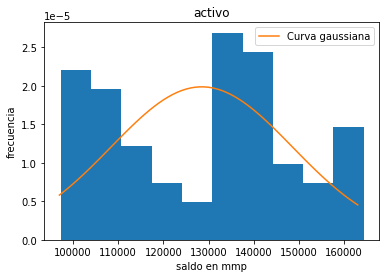

<Figure size 432x288 with 0 Axes>

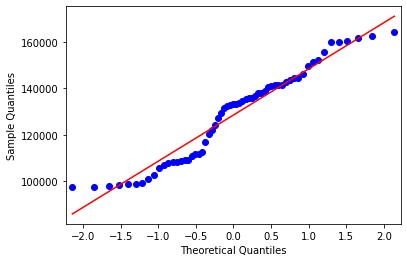

La distribución no parece normal con p = 0.0049, congruente con gráficos.


In [171]:
### Histograma ###

# Nos ayudamos de la librería scipy para generar una función de distribución de probabilidad o pdf
from scipy.stats import norm
plt.figure()
plt.hist(df['activo'], density=True)

plt.plot(np.arange(97000, 164000, 1000), norm.pdf(np.arange(97000, 164000, 1000), 128491.719260, 20073.571800), label = 'Curva gaussiana')
plt.legend()

plt.title("activo")
plt.xlabel("saldo en mmp")
plt.ylabel("frecuencia")
plt.show()

### Diagrama cuantil-cuantil ###

# Librería para diagrama cuantil-cuantil
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(df['activo'], line='s')
plt.show()

### Prueba de normalidad para saber si son datos paramétricos o no ###

# Librería para prueba de normalidad
from scipy.stats import shapiro

stat, p = shapiro(df['activo'])
alpha = 0.01
if p < alpha:
    print(f'La distribución no parece normal con p = {round(p, 4)}, congruente con gráficos.')
else:
    print(f'La distribución parece normal con p = {round(p, 4)} ')




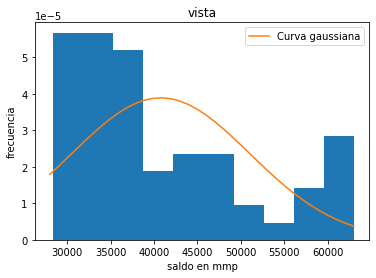

<Figure size 432x288 with 0 Axes>

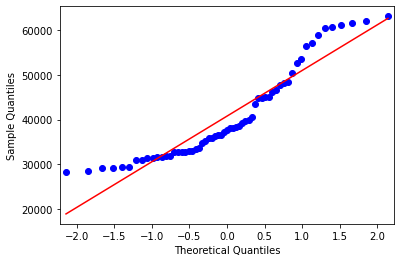

La distribución no parece normal con p = 0.0, congruente con gráficos.


In [172]:
### Histograma ###

# Nos ayudamos de la librería scipy para generar una función de distribución de probabilidad o pdf
from scipy.stats import norm
plt.figure()
plt.hist(df['vista'], density=True)

plt.plot(np.arange(28000, 64000, 1000), norm.pdf(np.arange(28000, 64000, 1000), 40770.660622,10263.719204), label = 'Curva gaussiana')
plt.legend()

plt.title("vista")
plt.xlabel("saldo en mmp")
plt.ylabel("frecuencia")
plt.show()

### Diagrama cuantil-cuantil ###

# Librería para diagrama cuantil-cuantil
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(df['vista'], line='s')
plt.show()

### Prueba de normalidad para saber si son datos paramétricos o no ###

# Librería para prueba de normalidad
from scipy.stats import shapiro

stat, p = shapiro(df['vista'])
alpha = 0.01
if p < alpha:
    print(f'La distribución no parece normal con p = {round(p, 4)}, congruente con gráficos.')
else:
    print(f'La distribución parece normal con p = {round(p, 4)} ')





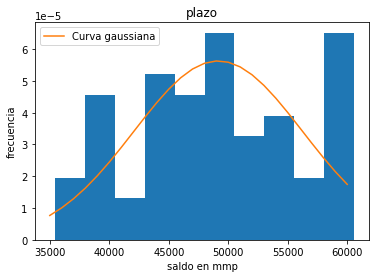

<Figure size 432x288 with 0 Axes>

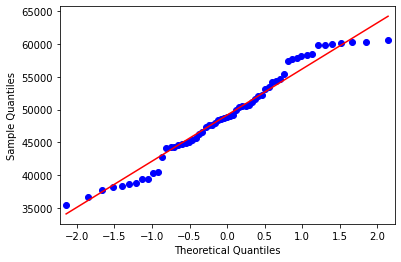

La distribución parece normal con p = 0.0423 


In [173]:
### Histograma ###

# Nos ayudamos de la librería scipy para generar una función de distribución de probabilidad o pdf
from scipy.stats import norm
plt.figure()
plt.hist(df['plazo'], density=True)

plt.plot(np.arange(35000, 61000, 1000), norm.pdf(np.arange(35000, 61000, 1000), 49154.932857,7087.349180), label = 'Curva gaussiana')
plt.legend()

plt.title("plazo")
plt.xlabel("saldo en mmp")
plt.ylabel("frecuencia")
plt.show()

### Diagrama cuantil-cuantil ###

# Librería para diagrama cuantil-cuantil
from statsmodels.graphics.gofplots import qqplot
plt.figure()
qqplot(df['plazo'], line='s')
plt.show()

### Prueba de normalidad para saber si son datos paramétricos o no ###

# Librería para prueba de normalidad
from scipy.stats import shapiro

stat, p = shapiro(df['plazo'])
alpha = 0.01
if p < alpha:
    print(f'La distribución no parece normal con p = {round(p, 4)}, congruente con gráficos.')
else:
    print(f'La distribución parece normal con p = {round(p, 4)} ')


